In [18]:
%matplotlib inline 
from __future__ import division
from pylab import *
import skimage as ski
from skimage import data, io, filters, exposure
from skimage.filters import rank
from skimage import img_as_float, img_as_ubyte
from skimage.morphology import disk
import skimage.morphology as mp
from skimage import util
from skimage.color import rgb2hsv, hsv2rgb, rgb2gray
from skimage.filters.edges import convolve
from matplotlib import pylab as plt
import numpy as np
import pandas as pd
from numpy import array
from IPython.display import display
from ipywidgets import interact, interactive, fixed
from ipywidgets import *
from ipykernel.pylab.backend_inline import flush_figures

import cv2

from skimage import measure


In [219]:
def mse(imageA, imageB):

    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

In [220]:
def skrajne(x, y): #przyjmuje na wejsciu wspolrzedne konturu (x[] i y[])
    lewy = 600
    prawy = 0
    gorny = 800
    dolny = 0
    for elem in x:
        if elem < lewy:
            lewy = elem
        if elem > prawy:
            prawy = elem
    for elem in y:
        if elem < gorny:
            gorny = elem
        if elem > dolny:
            dolny = elem
    return (lewy, prawy, gorny, dolny)
    

In [221]:
def rozmiar_obszaru(wielokat): #przyjmuje na wejsciu obraz
            #(tablice 2x2 z jedynkami tam gdzie jest cos zamalowane)
    lewy = 600
    prawy = 0
    gorny = 800
    dolny = 0
    for i in range(len(wielokat)):
        for j in range(len(wielokat[i])):
            if wielokat[i][j] == 1:
                if lewy > i:
                    lewy = i
                if prawy < i:
                    prawy = i
                if gorny > j:
                    gorny = j
                if gorny < j:
                    dolny = j
    print(prawy, lewy, dolny, gorny)     
    return (prawy - lewy, dolny - gorny)
    

In [222]:
def wspolczynnik_a_prostej(A, B):
    return (A[1] - B[1])/(A[0] - B[0])

In [223]:
def kopiuj(x):
    y = [row[:] for row in x]
    return y

In [224]:
from skimage.measure import (moments, moments_central, moments_normalized,
                             moments_hu)

table = []
norm2 = lambda x: -np.sign(x)*np.log10(np.abs(x))

def getHu(img):
    m = moments(img)
    cr = m[0, 1] / m[0, 0]
    cc = m[1, 0] / m[0, 0]
    mu = moments_central(img, cr, cc)
    mn = moments_normalized(mu)
    hu = moments_hu(mn)
    l = [norm2(f) for f in hu]
    return l

In [225]:
def warstewki(nazwa, liczba):
    import numpy as np
    import matplotlib.pyplot as plt

    from skimage import measure


    img = data.imread(nazwa)
    img = rgb2gray(img)

    img = img_as_float(img)
    perc = 0.6
    MIN = np.percentile(img, perc)
    MAX = np.percentile(img, 100-perc)
    #Percentyl – kwantyl rzędu k/100, gdzie k=1, …   , 99.
    #Intuicyjnie mówiąc, percentyl jest wielkością, poniżej której padają wartości zadanego procentu próbek.

    norm = (img - MIN) / (MAX - MIN)
    norm[norm[:,:] > 0.95] = 1
    norm[norm[:,:] < 0.05] = 0



    # norm[norm[:,:] > 0.5] = 1
    # norm[norm[:,:] < 0.5] = 0

    r = norm
    r = img_as_float(r)
    gamma = 1
    r = r**gamma

    r = mp.erosion(r)
    # Find contours at a constant value of 0.8
    print("srednia", np.mean(r))
    kopia = np.zeros(shape(img), dtype=np.uint8)
    contours = measure.find_contours(r, 0.73)

    # nowe
    warstwy = np.zeros(shape(img), dtype=np.float32)

    for n, contour in enumerate(contours):
        if shape(contour)[0] > 200:
            x = contour[:, 0]
            y = contour[:, 1]
            from skimage.draw import polygon
            rr, cc = polygon(contour[:, 0], contour[:, 1])
            warstwy2 = np.zeros(shape(img), dtype=np.float32)
            warstwy2[rr, cc] = 0.1
            warstwy += warstwy2

    io.imshow(warstwy)
    if np.mean(r) > 0.8:
        prog_jasnosc = 0.09 #tlo biale
    else:
        prog_jasnosc = 0.19 #tlo kolorowe

    for x in range(len(warstwy)):
        for y in range(len(warstwy[0])):
            if warstwy[x][y] > prog_jasnosc:
                warstwy[x][y] = 0.5
            else:
                warstwy[x][y] = 0.0


    contours = measure.find_contours(warstwy, 0.49)
    io.imsave("ok/ok" + str(liczba) + ".jpg", warstwy)
    #koniec nowe


srednia 0.446775655992


C:\Users\Oliwia\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


srednia 0.439754049916
srednia 0.455082516124
srednia 0.475795301364
srednia 0.600009202412
srednia 0.596313026574
srednia 0.570577068277
srednia 0.481501970402
srednia 0.3554217908
srednia 0.348863053133


KeyboardInterrupt: 

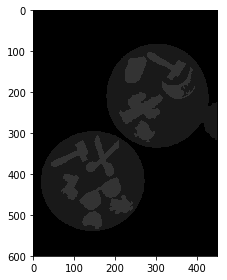

In [226]:
nazwy = []
for i in range(1, 109):
    nazwy.append("win2/obraz (" + str(i) + ").jpg")
for i in range(1, 109):
    warstewki(nazwy[i-1], i)

srednia 0.35423479544


C:\Users\Oliwia\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


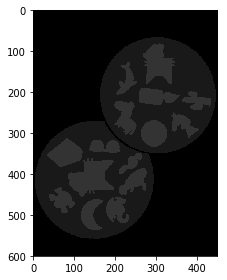

In [327]:
nazwa = "obraz11.jpg"
import numpy as np
import matplotlib.pyplot as plt

from skimage import measure


img = data.imread(nazwa)
img = rgb2gray(img)

img = img_as_float(img)
perc = 0.6
MIN = np.percentile(img, perc)
MAX = np.percentile(img, 100-perc)
#Percentyl – kwantyl rzędu k/100, gdzie k=1, …   , 99.
#Intuicyjnie mówiąc, percentyl jest wielkością, poniżej której padają wartości zadanego procentu próbek.

norm = (img - MIN) / (MAX - MIN)
norm[norm[:,:] > 0.95] = 1
norm[norm[:,:] < 0.05] = 0



# norm[norm[:,:] > 0.5] = 1
# norm[norm[:,:] < 0.5] = 0

r = norm
r = img_as_float(r)
gamma = 1
r = r**gamma

r = mp.erosion(r)
# Find contours at a constant value of 0.8
print("srednia", np.mean(r))
kopia = np.zeros(shape(img), dtype=np.uint8)
contours = measure.find_contours(r, 0.73)

# nowe
warstwy = np.zeros(shape(img), dtype=np.float32)

for n, contour in enumerate(contours):
    if shape(contour)[0] > 200:
        x = contour[:, 0]
        y = contour[:, 1]
        from skimage.draw import polygon
        rr, cc = polygon(contour[:, 0], contour[:, 1])
        warstwy2 = np.zeros(shape(img), dtype=np.float32)
        warstwy2[rr, cc] = 0.1
        warstwy += warstwy2

io.imshow(warstwy)
io.imsave("warstwy.jpg", warstwy)
if np.mean(r) > 0.8:
    prog_jasnosc = 0.09 #tlo biale
else:
    prog_jasnosc = 0.19 #tlo kolorowe

for x in range(len(warstwy)):
    for y in range(len(warstwy[0])):
        if warstwy[x][y] > prog_jasnosc:
            warstwy[x][y] = 0.5
        else:
            warstwy[x][y] = 0.0

    
contours = measure.find_contours(warstwy, 0.49)

#koniec nowe
io.imsave("warstwy2.jpg", warstwy)

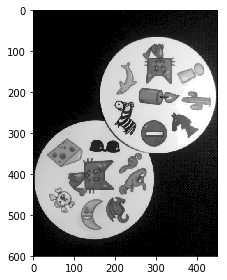

In [328]:
io.imshow(r)

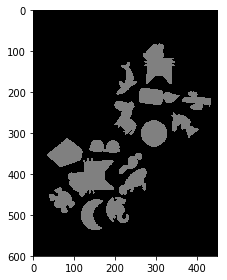

In [329]:
io.imshow(warstwy)

(80.980000000000004, 180.02000000000001, 266.98000000000002, 345.01999999999998)
0


C:\Users\Oliwia\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


(126.98, 206.02000000000001, 202.97999999999999, 251.02000000000001)
1
(189.97999999999999, 231.02000000000001, 256.98000000000002, 356.01999999999998)
2
(196.97999999999999, 244.02000000000001, 361.98000000000002, 433.01999999999998)
3
(220.97999999999999, 305.01999999999998, 196.97999999999999, 251.02000000000001)
4
(249.97999999999999, 311.01999999999998, 335.98000000000002, 402.01999999999998)
5
(268.98000000000002, 332.01999999999998, 261.98000000000002, 325.01999999999998)
6
(312.98000000000002, 382.01999999999998, 32.979999999999997, 120.02)
7
(315.98000000000002, 348.01999999999998, 136.97999999999999, 211.02000000000001)
8
(347.98000000000002, 398.01999999999998, 207.97999999999999, 265.01999999999998)
9
(359.98000000000002, 454.01999999999998, 83.980000000000004, 197.02000000000001)
10
(384.98000000000002, 451.01999999999998, 207.97999999999999, 276.01999999999998)
11
(431.98000000000002, 495.01999999999998, 38.979999999999997, 101.02)
12
(454.98000000000002, 520.019999999999

,0,0,1,2,3,4,5,6
0,0,2.782979,6.677557,9.529454,10.885620,-21.155450,14.231597,-21.394717
1,1,2.678792,5.721955,8.430533,9.270222,19.008389,-12.711503,18.124272
2,2,2.674256,5.604496,9.192757,9.842698,19.360425,12.646602,22.269310
3,3,2.851014,6.342618,9.705441,10.978586,-21.321112,-14.174478,22.634098
4,4,2.708183,5.854552,9.571319,9.939374,19.705132,12.870190,-20.359526
5,5,2.640930,5.825136,9.249981,10.171874,-20.182003,13.598936,-19.945883
6,6,2.862752,8.667549,11.882417,13.113563,-25.737702,-17.531299,-25.789519
7,7,2.877518,6.838734,10.191623,11.123039,22.195113,14.561530,-21.815173
8,8,2.363682,5.026540,9.699008,10.500721,-20.988013,13.303463,20.640508
9,9,2.635151,5.476145,9.005721,9.317325,18.482129,12.100217,-19.390859


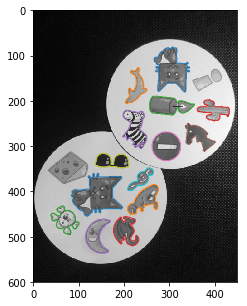

In [330]:
# UWAGA-  Kuba, jesli nie chcesz miec konturow z obrazka powyzej, tylko tak jak bylo, odkomentuj linijke ponizej

#contours = measure.find_contours(r, 0.73)

fig, ax = plt.subplots(figsize=(5, 5))

hu_moments = []
n_ind = []


for n, contour in enumerate(contours):

#     if shape(contour)[0] > 200 and  n==0:
    if shape(contour)[0] > 200:
        x = contour[:, 0]
        y = contour[:, 1]
        punkty_skrajne = skrajne(x, y)
        print(punkty_skrajne)
        print(n)
        ax.plot(contour[:, 1], contour[:, 0], linewidth=1)
        from skimage.draw import polygon
        wielokat = np.zeros(shape(img), dtype=np.uint8)
        
        k = np.zeros(shape(img), dtype=np.float32)
        #k = np.float32(k)
        rr, cc = polygon(contour[:, 0], contour[:, 1])
        wielokat[rr, cc] = 1
        kopia[rr, cc] = 1
        
        for i in range(len(wielokat)):
            for j in range(len(wielokat[0])):
                    if wielokat[i][j] == 1:
                        k[i][j] = img[i][j]
                        #k[i][j] = 1
                    else:
                        k[i][j] = 0
#                         print(k[i][j])
        import skimage.measure as miarka
        k = k[int(punkty_skrajne[0]):int(punkty_skrajne[1]), int(punkty_skrajne[2]):int(punkty_skrajne[3])]
        kolorowe = data.imread(nazwa)
        kolorowe = kolorowe[int(punkty_skrajne[0]):int(punkty_skrajne[1]), int(punkty_skrajne[2]):int(punkty_skrajne[3])]
        wiel = wielokat[int(punkty_skrajne[0]):int(punkty_skrajne[1]), int(punkty_skrajne[2]):int(punkty_skrajne[3])]
        
        io.imsave("k.jpg", k, plugins = None)
        io.imsave("k_kolorowe.jpg", kolorowe, plugins = None)
       # io.imshow(k)
        # k to ten wyciety obrazek
        #TO DO- czemu same zera w Hu? :<
        kol = io.imread("k_kolorowe.jpg")
        red = kolorowe[:,:, 0]
        green = kolorowe[:,:, 1]
        blue = kolorowe[:,:, 2]

        srednia_red = 0.0
        srednia_green = 0.0
        srednia_blue = 0.0
        licz = 0
        for i in range(len(kol)):
            for j in range(len(kol[0])):
                if wiel[i][j] == 1:
                    srednia_red += red[i][j]
                    srednia_green += green[i][j]
                    srednia_blue += blue[i][j]
                    licz += 1
        srednia_red /= licz
        srednia_green /= licz
        srednia_blue /= licz
        hu_moments.append( getHu(io.imread("k.jpg")) )#+ [srednia_red, srednia_green, srednia_blue])
        n_ind.append(n)
        ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)
        
#         print(hu_moments)
    
        im2, contours, hierarchy = cv2.findContours(wielokat,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        cnt = contours[0]

      
        

        
        #cv2.getHuMoments(momenty)
ax.axis('image')
savefig("do.jpg")
# wyświetlanie wyników
df1 =  pd.DataFrame(n_ind) 
frames = [df1, pd.DataFrame(hu_moments)]
result = pd.concat(frames, axis = 1)
display(result)

plt.show()


In [331]:
def getMin(sum_product):
    indices  = (0, 1, np.Inf)
    temp_sum = np.Inf
    for i in sum_product:
        if i[2] < temp_sum:
            temp_sum = i[2]
            indices = i
    return indices


def getCopies(df):
    x, y = 0, 1
    temp = []
    for n in range(len(df)):
        for j in range(len(df)):
            if not(n == j): 
                sum_product = 0
                for i in range(len(df.iloc[j])):
                    sum_product += ((df.iloc[j, i] - df.iloc[n,i])**2)/(df.iloc[j, i])**2
                temp.append((n, j, sum_product))
    copy = getMin(temp)
    return copy


In [297]:
duplikaty = getCopies(pd.DataFrame(hu_moments))
# tu patrze jakie indeksy w hu_moments mają najbardziej podobne
print(duplikaty)
# a tu srawdzam jakie indeksty powyższe indeksy mają w naszej tabeli konturów (63 i 69)
result.iloc[:, 0]



(10, 4, 0.0055222602332975317)


0      0
1      1
2      2
3      3
4      5
5      9
6     10
7     11
8     12
9     13
10    14
11    15
12    16
13    17
14    18
15    19
Name: 0, dtype: int64

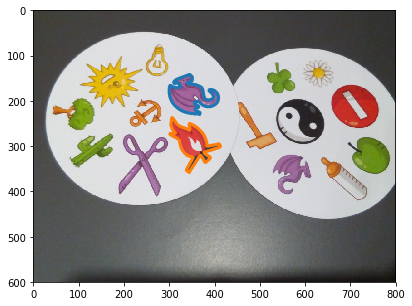

In [298]:
fig, ax = plt.subplots(figsize=(15, 5))
kolorowy = io.imread(nazwa)
ax.imshow(kolorowy, interpolation='nearest')
contours = measure.find_contours(warstwy, 0.49)


for n, contour in enumerate(contours):
    #if n== 74 or n==77 or n==1:
    if n == result.iloc[:, 0][duplikaty[0]] or n == result.iloc[:, 0][duplikaty[1]]:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=3)
        
    
savefig("kotki.png")

16


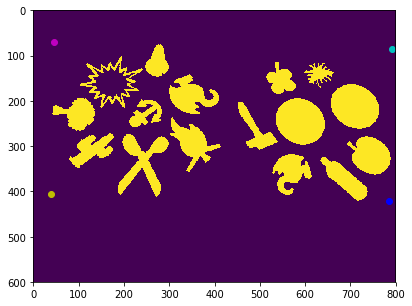

In [285]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(kopia, interpolation='nearest')

im2, contours, hierarchy = cv2.findContours(kopia, cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
a = []
for i in range(len(contours)):
    for j in range(len(contours[i])):
        a.append(contours[i][j][0])
print(len(contours))
a = np.array(a)
cnt = a
rect = cv2.minAreaRect(cnt) #tego uzywam do znalezienia MAR, by wiedziec jak obroc
box = cv2.boxPoints(rect)
ax.plot(box[0][0], box[0][1], 'bo')
ax.plot(box[1][0], box[1][1], 'yo')
ax.plot(box[2][0], box[2][1], 'mo')
ax.plot(box[3][0], box[3][1], 'co')
savefig("kropki.jpg")


746.9181669042789


C:\Users\Oliwia\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


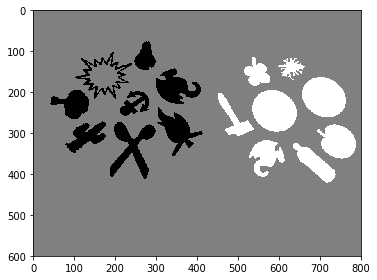

In [286]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

box1 =  cv2.boxPoints(rect)
box2 =  cv2.boxPoints(rect)

punkty = [tuple(elem) for elem in box]
punkty = [Point(elem) for elem in box]
print( punkty[0].distance(punkty[1]))
if punkty[0].distance(punkty[1]) > punkty[0].distance(punkty[3]):
    
    box1[0]= [(box[0][0] + box[1][0])/2, (box[0][1] + box[1][1])/2]
    box1[3] = [(box[3][0] + box[2][0])/2, (box[3][1] + box[2][1])/2]

    box2[1]= [(box[0][0] + box[1][0])/2, (box[0][1] + box[1][1])/2]
    box2[2] = [(box[3][0] + box[2][0])/2, (box[3][1] + box[2][1])/2]
else:
    box1[0]= [(box[0][0] + box[3][0])/2, (box[0][1] + box[3][1])/2]
    box1[1] = [(box[1][0] + box[2][0])/2, (box[1][1] + box[2][1])/2]

    box2[2]= [(box[2][0] + box[1][0])/2, (box[2][1] + box[1][1])/2]
    box2[3] = [(box[3][0] + box[0][0])/2, (box[3][1] + box[0][1])/2]

box1 = [tuple(elem) for elem in box1]
box2 = [tuple(elem) for elem in box2]
polygon1 = Polygon(box1)
polygon2 = Polygon(box2)
polygon = Polygon(box)
contours = measure.find_contours(warstwy, 0.49)
rys = np.ones(shape(img), dtype=np.float32)
rys[:, :] = 0.5

for n, contour in enumerate(contours):
    if shape(contour)[0] > 200:
        x = contour[:, 0]
        y = contour[:, 1]
        s = skrajne(x, y)
        point = Point((s[2] + s[3])/2, (s[0]+s[1])/2)
        from skimage.draw import polygon as poli
        rr, cc = poli(contour[:, 0], contour[:, 1])
        if polygon1.contains(point):
            rys[rr, cc] = 0
        if polygon2.contains(point):
            rys[rr, cc] = 1.0

io.imshow(rys, cmap=plt.cm.gray)
io.imsave("zdjecia/czyje_pola_" + str(nazwa) + ".png", rys)
        

In [287]:
nazwa = "obraz2.jpg"
img = data.imread(nazwa)
kol = rgb2hsv(img)
hue = kol[:,:, 0]
sat = kol[:,:, 1]
val = kol[:,:, 2]
img = rgb2gray(img)
kolorowe = data.imread(nazwa)
red = kolorowe[:,:, 0]
green = kolorowe[:,:, 1]
blue = kolorowe[:,:, 2]

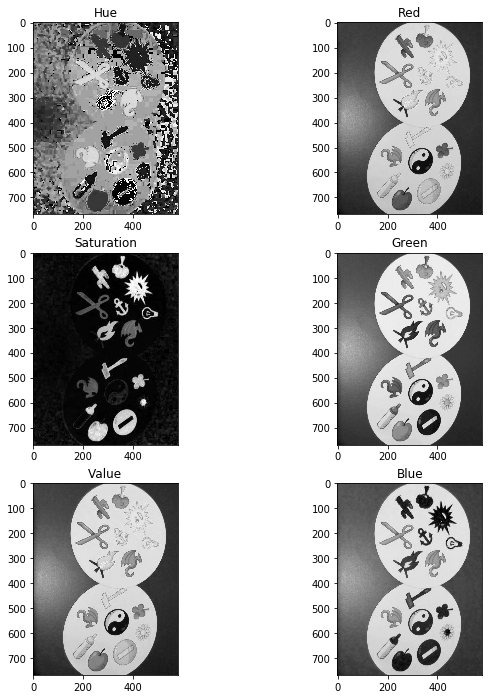

In [288]:
fig, ax = plt.subplots(3, 2, figsize=(10, 12))
ax[0][0].imshow(hue, cmap=plt.cm.gray)
ax[0][0].set_title("Hue")
ax[1][0].imshow(sat, cmap=plt.cm.gray)
ax[1][0].set_title("Saturation")
ax[2][0].imshow(val, cmap=plt.cm.gray)
ax[2][0].set_title("Value")
ax[0][1].imshow(red, cmap=plt.cm.gray)
ax[0][1].set_title("Red")
ax[1][1].imshow(green, cmap=plt.cm.gray)
ax[1][1].set_title("Green")
ax[2][1].imshow(blue, cmap=plt.cm.gray)
ax[2][1].set_title("Blue")
savefig('wykres.png')